In [14]:
from models import Models
from losses import *
from Line_of_horizont_fitting import Line_of_horizont_fitting
from Utils import Utils
import numpy as np

from keras.backend.tensorflow_backend import set_session
from keras import backend as K
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = False  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

%load_ext autoreload
%autoreload 2 

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1925936902573486006, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1803324812462396712
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17473306295231056765
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1296826368
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6819578488227882167
 physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0"]

In [6]:
path_models='./models_saved/Final_2/'
img_w=160
img_h=160

model_class = Models()

model1=model_class.load_model(path_models+'unet160--mediumBN_mobilenetv1--dice_coef_loss')

In [7]:
import matplotlib.pyplot as plt
import cv2
path_images = "./video_input/DS8/*"
path_2_save = "./video_input/DS8_result_2/"
for path_img, imageOUT, predict, img_inp_or, pred_inp_or in Utils.test_from_folder(path_images, model1, img_w, img_h, steps=300):
    name= path_img[path_img.rfind("/") + 1::]
    print(name)
    cv2.imwrite(path_2_save+"prediction-"+name, cv2.cvtColor(imageOUT, cv2.COLOR_RGB2BGR))
    cv2.imwrite(path_2_save+"mask_prediction-"+name, cv2.cvtColor(predict, cv2.COLOR_RGB2BGR))
    cv2.imwrite(path_2_save+"image_inpNN_or_size-"+name, cv2.cvtColor(img_inp_or, cv2.COLOR_RGB2BGR))
    cv2.imwrite(path_2_save+"mask_prediction_or_size-"+name, cv2.cvtColor(pred_inp_or, cv2.COLOR_RGB2BGR))

0.0
Frame (120).png
1.5795233249664307
Frame (89).png
1.6582744121551514
Frame (21).png
1.7275137901306152
Frame (14).png
1.8124785423278809
Frame (78).png
1.885434865951538
Frame (58).png
1.9545402526855469
Frame (3).png
2.019566059112549
Frame (101).png
2.071864128112793
Frame (133).png
2.1259419918060303
Frame (96).png
2.198760509490967
Frame (59).png
2.276336908340454
Frame (68).png
2.342921018600464
Frame (38).png
2.407421350479126
Frame (53).png
2.4796254634857178
Frame (122).png
2.5501344203948975
Frame (36).png
2.6430747509002686
Frame (48).png
2.728681802749634
Frame (18).png
2.781521797180176
Frame (132).png
2.8398756980895996
Frame (97).png
2.9147136211395264
Frame (43).png
2.9820916652679443
Frame (30).png
3.058711528778076
Frame (69).png
3.1966841220855713
Frame (49).png
3.2768173217773438
Frame (81).png
3.351962089538574
Frame (98).png
3.414285659790039
Frame (113).png
3.4947190284729004
Frame (92).png
3.5640575885772705
Frame (24).png
3.6319046020507812
Frame (23).png
3.

In [ ]:
filename = "video_input/prophr3.mp4"

Utils.test_from_video(filename, model1, img_w, img_h, 100)

In [ ]:
filename = "video_input/lakegarda-may-9-prop-8.avi"#prophr3.mp4"

Utils.test_speed_from_video(filename, model1, img_w, img_h, 100)

In [8]:
from dataset import Dataset
path = 'Test/'
img_w = 1280
img_h = 720
n_labels = 2 #6
dataset = Dataset(path, img_w, img_h, n_labels)
x, y = dataset.createDataset(augmentation=False, prob1=False)

/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4366.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4366.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2065.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2065.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4720.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4720.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/5074.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/5074.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4425.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4425.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4956.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/T

/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2950.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2950.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/649.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/649.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/767.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/767.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4248.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/4248.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2596.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/2596.0-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/3422.0.png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/

/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(91).png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(91)-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(101).png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(101)-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(111).png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(111)-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(121).png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(121)-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(131).png  -  /home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(131)-annotation.png
/home/lorenzo/Documenti/UNIVR/Intcatch_pixelwise_segmentation/Test/Frame(141).png  -  /home/lorenzo/Documen

In [9]:
model_class = Models()
path_models='./models_saved/Final_2/'
model_path_name= ['unet160--small--dice_coef_loss',
                  'unet160--smallBN--dice_coef_loss',
                  'unet160--medium--dice_coef_loss',
                  'unet160--mediumBN--dice_coef_loss',
                  'unet160--mediumBN_mobilenetv1--dice_coef_loss',
                  ]

for models_name in model_path_name:
    model1=model_class.load_model(path_models+models_name)
    recall_list, precision_list, specificity_list, accuracy_list, f1score_list = Utils.accuracy_on_images(x, y, model1, 160, 160, 1, False)
    print('*' * 30)
    print(models_name)
    print('N PARAMETERS =', model1.count_params())
    print("RECALL =", sum(recall_list) / float(len(recall_list)))
    print("PRECISION =", sum(precision_list) / float(len(precision_list)))
    print("SPECIFICITY =", sum(specificity_list) / float(len(specificity_list)))
    print("ACCURACY =", sum(accuracy_list) / float(len(accuracy_list)))
    print("F1SCORE =", sum(f1score_list) / float(len(f1score_list)))
    print('*' * 30)
    
    K.clear_session()

******************************
unet160--small--dice_coef_loss
N PARAMETERS = 948001
RECALL = 0.9905835415786254
PRECISION = 0.99590388844784
SPECIFICITY = 0.00408320630096308
ACCURACY = 0.9949800721355767
F1SCORE = 0.992963493273004
******************************
******************************
unet160--smallBN--dice_coef_loss
N PARAMETERS = 950817
RECALL = 0.9939936727094149
PRECISION = 0.9939403334167068
SPECIFICITY = 0.005937098522955754
ACCURACY = 0.994527239680853
F1SCORE = 0.9939220417448121
******************************
******************************
unet160--medium--dice_coef_loss
N PARAMETERS = 1925601
RECALL = 0.9912226192439252
PRECISION = 0.9960466396013865
SPECIFICITY = 0.003935964458465463
ACCURACY = 0.9954966276445262
F1SCORE = 0.993333409136451
******************************
******************************
unet160--mediumBN--dice_coef_loss
N PARAMETERS = 1931233
RECALL = 0.9938899559513644
PRECISION = 0.9956646052598108
SPECIFICITY = 0.0038459504491197894
ACCURACY = 0.99

In [17]:
model_class = Models()
path_models='./models_saved/Final_2/'
model_path_name= ['unet160--small--dice_coef_loss',
                  'unet160--smallBN--dice_coef_loss',
                  'unet160--medium--dice_coef_loss',
                  'unet160--mediumBN--dice_coef_loss',
                  'unet160--mediumBN_mobilenetv1--dice_coef_loss',
                  ]

for models_name in model_path_name:
    model1=model_class.load_model(path_models+models_name)
    recall_list, precision_list, specificity_list, accuracy_list, f1score_list = Utils.accuracy_on_line_of_horizont_area(x, y, model1, 160, 160, 1, False)
    print('*' * 30)
    print(models_name)
    print('N PARAMETERS =', model1.count_params())
    print("PRECISION =", sum(precision_list) / float(len(precision_list)))
    print("RECALL =", sum(recall_list) / float(len(recall_list)))
    #print("SPECIFICITY =", sum(specificity_list) / float(len(specificity_list)))
    print("ACCURACY =", sum(accuracy_list) / float(len(accuracy_list)))
    print("F1SCORE =", sum(f1score_list) / float(len(f1score_list)))
    print('*' * 30)

    K.clear_session()

******************************
unet160--small--dice_coef_loss
N PARAMETERS = 948001
PRECISION = 0.9939993616460135
RECALL = 0.9859206287567975
ACCURACY = 0.9913402176097654
F1SCORE = 0.9896502169429301
******************************
******************************
unet160--smallBN--dice_coef_loss
N PARAMETERS = 950817
PRECISION = 0.9903894000682186
RECALL = 0.9901608891113212
ACCURACY = 0.9907084461937092
F1SCORE = 0.9901615744136906
******************************
******************************
unet160--medium--dice_coef_loss
N PARAMETERS = 1925601
PRECISION = 0.9930017599275445
RECALL = 0.9871380728495881
ACCURACY = 0.991640539170802
F1SCORE = 0.9896790264859596
******************************
******************************
unet160--mediumBN--dice_coef_loss
N PARAMETERS = 1931233
PRECISION = 0.9926719545081333
RECALL = 0.9900365025226622
ACCURACY = 0.9924124022220272
F1SCORE = 0.9912181876684346
******************************
******************************
unet160--mediumBN_mobilenetv1-

In [18]:
model_class = Models()
path_models='./models_saved/Final_2/'
model_path_name= ['unet160--small--dice_coef_loss',
                  'unet160--smallBN--dice_coef_loss',
                  'unet160--medium--dice_coef_loss',
                  'unet160--mediumBN--dice_coef_loss',
                  'unet160--mediumBN_mobilenetv1--dice_coef_loss',
                  ]

max_distances_array = []
names_array = []

for models_name in model_path_name:
    model1=model_class.load_model(path_models+models_name)
    avg_distance, max_distance = Utils.median_accuracy_line_of_horizont(x, y, model1, 160, 160, 1, False)
    print('*' * 30)
    print("-- ", models_name, " --")
    print("Mean Max error :", np.mean(max_distance))
    print("Median Max error :", np.median(max_distance))
    print("Standard Deviation :", np.std(max_distance))
    print("Quantile 0.25-0.75:", np.quantile(max_distance, 0.25), " - ", np.quantile(max_distance, 0.75))
    print("Average error :", np.mean(avg_distance))
    print("Max error :", np.max(max_distance))
    print('*' * 30)
    
    names_array.append(models_name)
    max_distances_array.append(max_distance)
    
    K.clear_session()

******************************
--  unet160--small--dice_coef_loss  --
Mean Max error : 10.558823529411764
Median Max error : 8.0
Standard Deviation : 11.302935181356927
Quantile 0.25-0.75: 5.0  -  11.75
Average error : 0.00445322074142157
Max error : 87
******************************
******************************
--  unet160--smallBN--dice_coef_loss  --
Mean Max error : 13.009803921568627
Median Max error : 8.5
Standard Deviation : 18.566517986893277
Quantile 0.25-0.75: 5.0  -  12.75
Average error : 0.00542443368949142
Max error : 125
******************************
******************************
--  unet160--medium--dice_coef_loss  --
Mean Max error : 11.872549019607844
Median Max error : 8.0
Standard Deviation : 15.684806916640797
Quantile 0.25-0.75: 5.0  -  12.75
Average error : 0.004705678902420343
Max error : 123
******************************
******************************
--  unet160--mediumBN--dice_coef_loss  --
Mean Max error : 10.558823529411764
Median Max error : 7.0
Standar

In [22]:
names_array = ["Half-Conv 160x160", "Half-Conv BN 160x160", "Full 160x160", "Full BN 160x160", "Full mobile-net-v1-layer 160x160"]

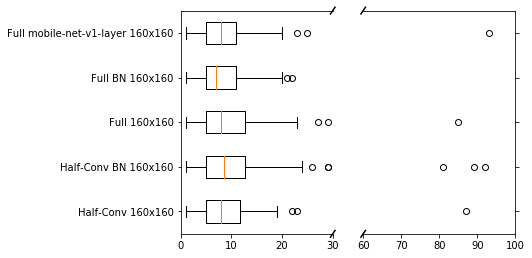

In [25]:
fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [10, 10]})

ax1.boxplot(max_distances_array, vert=False, labels=names_array)
ax1.set_xlim(0,30)

ax2.boxplot(max_distances_array, vert=False, labels=names_array)
ax2.set_xlim(60,100)

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelright='off')
ax2.yaxis.tick_right()
ax2.tick_params(labelright='off')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

fig1.subplots_adjust(top=0.9)

In [ ]:
import matplotlib.pyplot as plt
fig2, ax2 = plt.boxplot(max_distances_array, vert=False, labels=names_array)

In [ ]:
!cd models_saved/history/

In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
history_path=['models_saved/history/unet160--history--largeBN--binary_crossentropy',
              'models_saved/history/unet160--history--largeBN--mae', 
              'models_saved/history/unet160--history--largeBN--mse',
              'models_saved/history/unet160--history--largeBN--dice_coef_loss', ]

historyes = []
for path in history_path:
    with (open(path+"", "rb")) as openfile:
        while True:
            try:
                historyes.append(pickle.load(openfile))
            except EOFError:
                break

In [ ]:
# list all data in history
print(historyes[0].keys())
# summarize history for loss
for history in historyes:
    plt.plot(history['val_dice_coef'])
plt.title('model accuracy')
plt.ylabel('Dice/F1 metric')
plt.xlabel('epoch')
plt.legend(['binary_crossentropy_loss',
            'mean_absolute_error_loss',
            'mean_squared_error_loss',
            'dice_coef_loss'], loc='lower right')
plt.axis([0,200,0.9,1])
plt.show()